## importing libreries and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('task1.xlsx')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## preprocessing and EDA

In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
import seaborn as sns

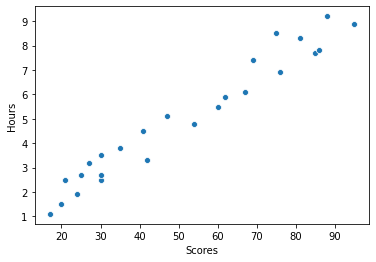

In [6]:
sns.scatterplot(df.Scores,df.Hours,data=df)

#### it seems that hours and scores are strongly correlated

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:-1].values,df['Scores'].values,test_size=0.15)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.metrics import mean_squared_error
import math

In [38]:
models=[]
models.append(('tree',DecisionTreeRegressor()))
models.append(('forest',RandomForestRegressor(n_estimators=5)))
models.append(('boost',AdaBoostRegressor()))
models.append(('svm',SVR(kernel='linear')))
models.append(('linear_regression',LinearRegression()))
for name,model in models:
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Name of algorithm is :',name)
    print('RMSE is :',math.sqrt(mean_squared_error(y_test,prediction)))
    print('\n')


Name of algorithm is : tree
RMSE is : 8.170067319184096


Name of algorithm is : forest
RMSE is : 5.510217781540036


Name of algorithm is : boost
RMSE is : 6.252221827300899


Name of algorithm is : svm
RMSE is : 5.638971255029933


Name of algorithm is : linear_regression
RMSE is : 5.185102728863751




#### linear regression algorith is giving less RMSE.

## new prediction

In [39]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
reg.predict(([[9.25]]))

array([92.38153144])

#### so if a student studies 9.25 hours per day then he/she will score approx 92.4 according to my model.